# Proyecto

## Práctica 3: clustering

#### 2.- Comparar los resultados obtenidos mediante K-means con los resultantes de aplicar clustering jerárquico y GMM al conjunto de datos considerado. Analiza el tiempo de ejecución de cada procedimiento. Para ello se partirá del notebook https://formacion.uam.es/mod/resource/view.php? id=75518.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random 
import math
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import cluster
from time import time
import seaborn as sns
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

In [3]:
# funciones
# Lo primero que vamos a hacer es recuperar la variable registered a partir de restar cnt y casual
def f(row):
    return (row['cnt']-row['casual'])

# Se observa que el valor máximo de 'cnt' es cercano a 1000, así que vamos a formar una nueva variable que cree a 
# partir de 'cnt' 4 clases distintas según intervalos de valores.
def f_class(row):
    if row["cnt"] < 250:
        return 0
    elif row["cnt"] >= 250 and row["cnt"] < 500:
        return 1
    elif row["cnt"] >= 500 and row["cnt"] < 750:
        return 2  
    elif row["cnt"] >= 750 and row["cnt"] < 1000:
        return 3
    print(row)

# carga de datos del fichero horario original e inclusión de columnas
def carga_datos():
    df_bike = pd.read_csv('df_bike_final.csv', sep=',')
    df_bike = df_bike.iloc[:,1:]
    
    df_bike['registered'] = df_bike.apply(f, axis=1)
    
    df_bike['cnt_class'] = df_bike.apply(f_class, axis=1)

    return df_bike

In [5]:
# llamamos a las funciones y vemos los datos obtenidos
df_bike = carga_datos()

print("num_rows: %d\tColumnas: %d\n" % (df_bike.shape[0], df_bike.shape[1]) )
print("Columnas:\n", list(df_bike.columns))

num_rows: 17379	Columnas: 17

Columnas:
 ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'cnt', 'season_weather', 'day', 'registered', 'cnt_class']


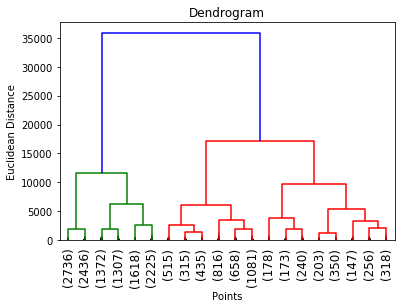

In [7]:
# uso de dendograma
X=df_bike.values

Z = linkage(X, metric='euclidean', method='ward')

plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean Distance')

# genera el dendograma
dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)

plt.show()

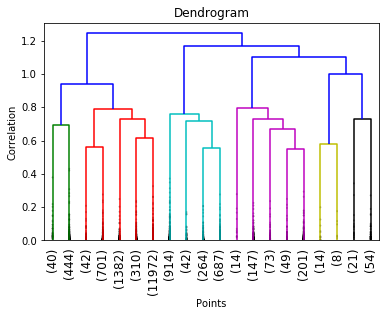

In [8]:
# uso de dendograma con otro método
X=df_bike.values

Z = linkage(X, metric='correlation', method='complete')

plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Correlation')

# genera el dendograma
dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True
)

plt.show()

In [9]:
t0 = time()

# Clustering jerárquico aglomerativo
single_link = AgglomerativeClustering(linkage='ward',n_clusters=2)

h_clusters = single_link.fit(X)

print("done in %0.3fs" % (time() - t0))

done in 15.865s


In [10]:
bikes = h_clusters.fit_predict(X)
bikes

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
df_bike_aglom = df_bike
df_bike_aglom["Cluster"] = bikes
df_bike_aglom.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day,registered,cnt_class,Cluster
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,16,1,1,13.0,0,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,40,1,1,32.0,0,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,32,1,1,27.0,0,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,13,1,1,10.0,0,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1,1,1.0,0,1


In [12]:
# recuento por cluster de lo obtenido con aglomerativo
pd.value_counts(df_bike_aglom['Cluster'])

1    11694
0     5685
Name: Cluster, dtype: int64

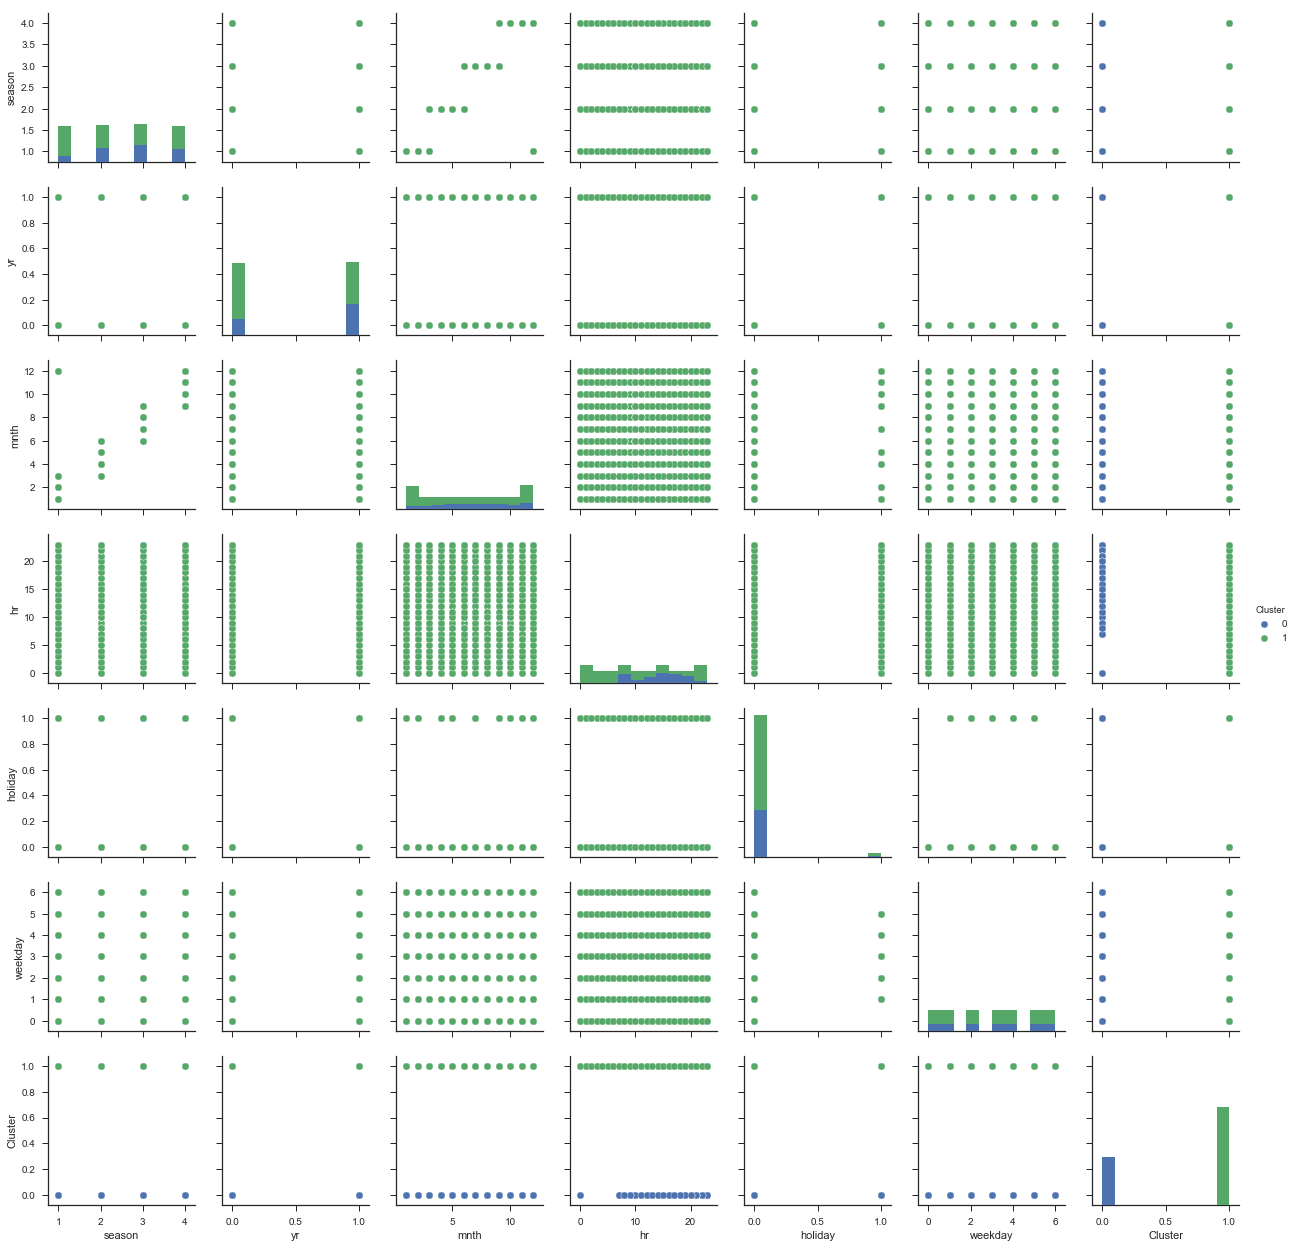

In [13]:
# graficamos los datos del dataset donde se aprecia para cada cluster con un color diferente
sns.set(style="ticks")

vars_uno = df_bike_aglom.columns[ : 6]
vars_dos = df_bike_aglom.columns[6 : 12]
vars_tres = df_bike_aglom.columns[12 : -1]
target_bike = df_bike_aglom.columns[-1]

sns.pairplot( df_bike_aglom[ list(vars_uno) + [target_bike] ], hue="Cluster" )

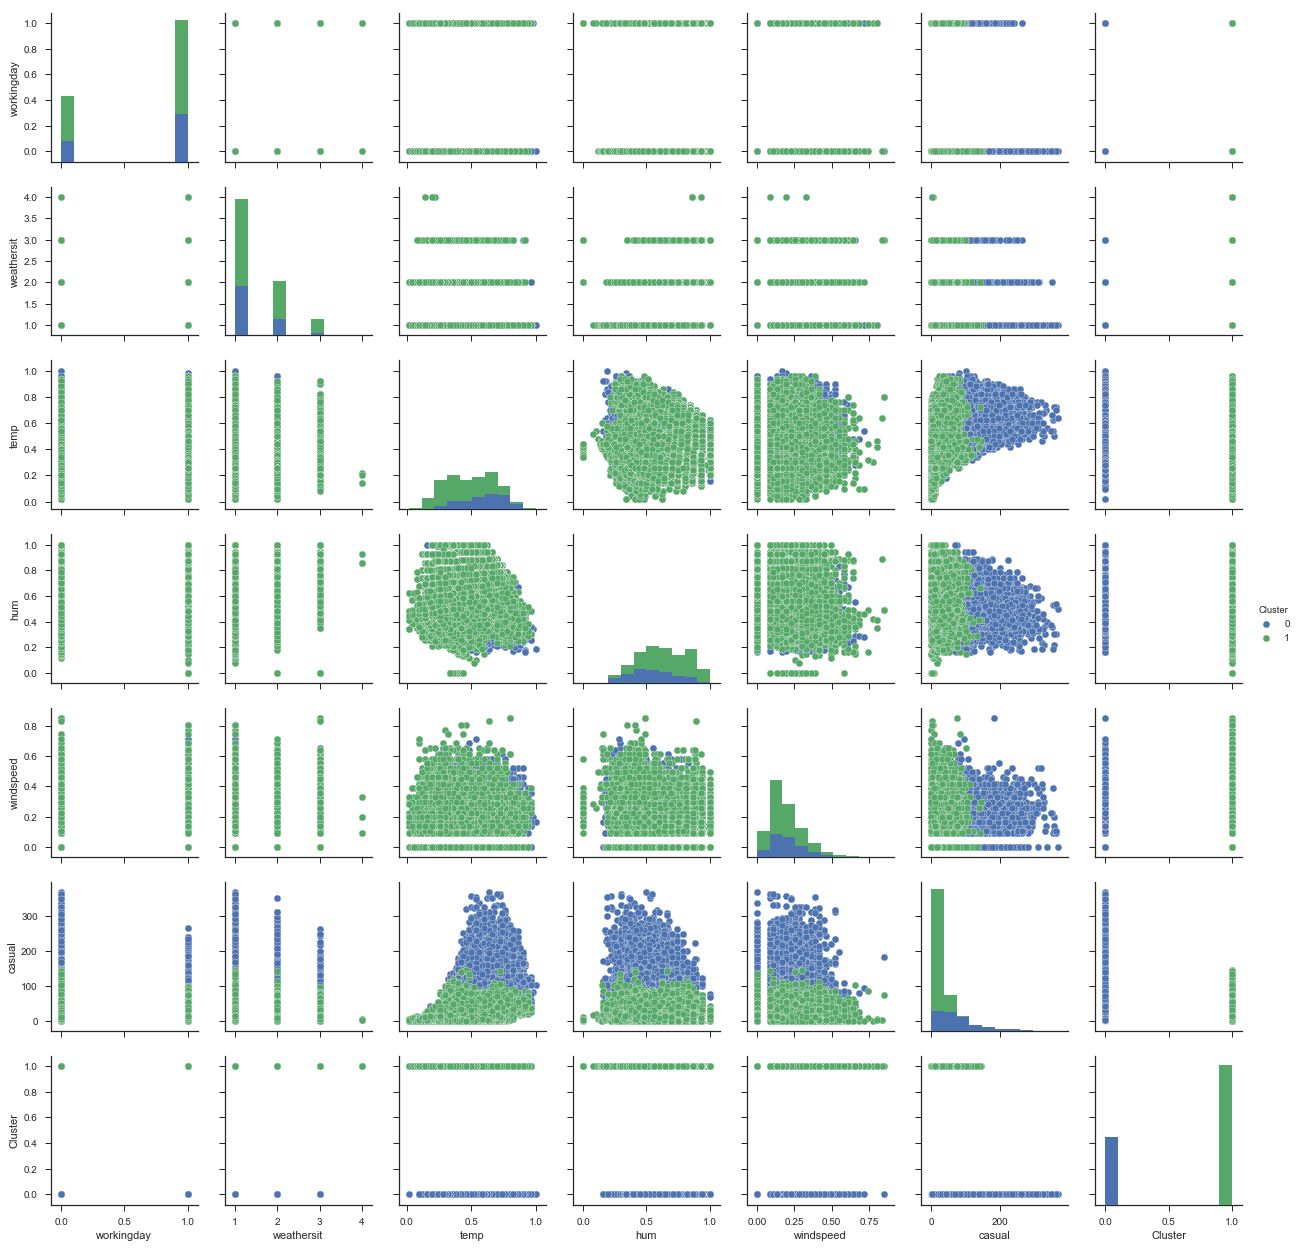

In [14]:
sns.pairplot( df_bike_aglom[ list(vars_dos) + [target_bike] ], hue="Cluster" )

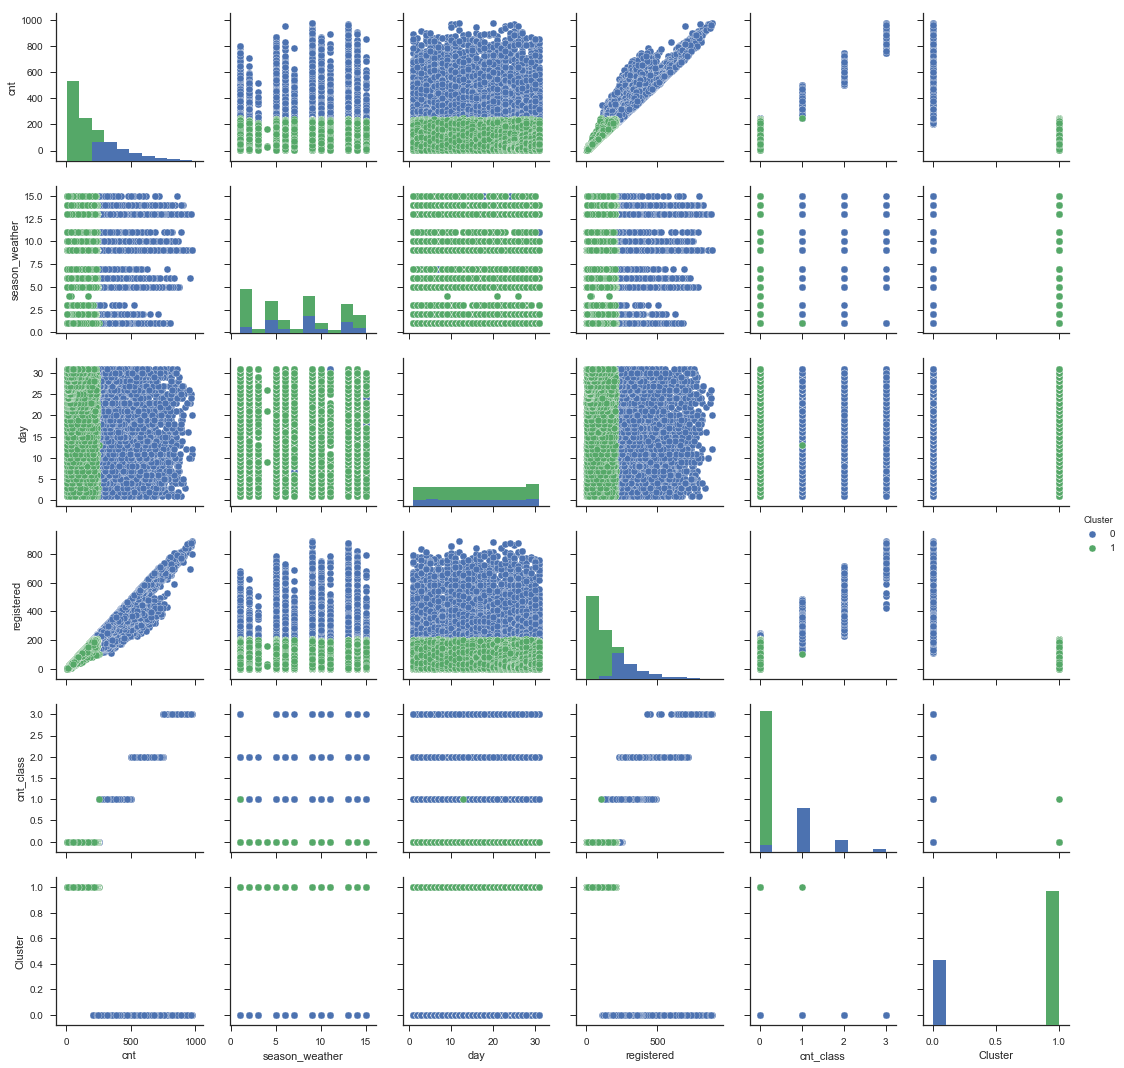

In [15]:
sns.pairplot( df_bike_aglom[ list(vars_tres) + [target_bike] ], hue="Cluster" )

In [16]:
# utilizando kneighbors
df_bike_2 = carga_datos()
X_2 = df_bike_2.values

connectivity = kneighbors_graph(X_2, n_neighbors=30, include_self=False)

In [17]:
t0 = time()

single_link2 = AgglomerativeClustering(linkage="ward",n_clusters=2,connectivity=connectivity)

h_clusters2 = single_link2.fit(X_2)

print("done in %0.3fs" % (time() - t0))

done in 6.059s


In [18]:
bikes_2 = h_clusters2.fit_predict(X_2)
df_bike_kneighbors = df_bike_2
df_bike_kneighbors["Cluster"] = bikes_2
df_bike_kneighbors.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day,registered,cnt_class,Cluster
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,16,1,1,13.0,0,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,40,1,1,32.0,0,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,32,1,1,27.0,0,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,13,1,1,10.0,0,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1,1,1.0,0,1


In [19]:
pd.value_counts(df_bike_kneighbors['Cluster'])

1    11694
0     5685
Name: Cluster, dtype: int64

#### Vamos a usar GMM

In [20]:
df_bike_3 = carga_datos()
X_3 = df_bike_3.values

t0 = time()

gmm = mixture.GaussianMixture(n_components=2).fit(X_3)

print("done in %0.3fs" % (time() - t0))

done in 0.682s


In [21]:
bikes_3 = gmm.predict(X_3)
df_bike_gmm = df_bike_3
df_bike_gmm["Cluster"] = bikes_3
df_bike_gmm.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day,registered,cnt_class,Cluster
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,16,1,1,13.0,0,0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,40,1,1,32.0,0,0
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,32,1,1,27.0,0,0
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,13,1,1,10.0,0,0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1,1,1.0,0,0


In [22]:
# recuento por cluster de lo obtenido con gmm
pd.value_counts(df_bike_gmm['Cluster'])

0    12237
1     5142
Name: Cluster, dtype: int64

#### Comparación de los datos obtenidos con aglomerativo, GMM y lo obtenido anteriormente con K-means

Reparto de los registros por cluster se ha obtenido:
* Aglomerativo:
    Cluster 0: 5685 
    Cluster 1: 11694
* GMM:
    Cluster 0: 12237
    Cluster 1: 5142
* K-means:
    Cluster 0: 12776
    Cluster 1: 4603

Tiempos obtenidos al ejecutar los algoritmos:
* Aglomerativo: 
    Sin usar kneighbors: 15.865s
    Con kneighbors: 6.059s
* GMM: 0.682s

In [23]:
# Con Describe analizamos los resultados obtenidos con Clustering aglomerativo y gmm.
df_bike_aglom_0 = df_bike_aglom[df_bike_aglom['Cluster']==0]
df_bike_aglom_0.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day,registered,cnt_class,Cluster
count,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.00000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.0
mean,2.756376,0.663676,7.078628,14.470888,0.024450,3.054002,0.695515,1.314160,0.59499,0.552185,0.200699,78.477397,402.623923,8.339666,15.548813,324.146526,1.159894,0.0
std,0.959377,0.472493,2.885081,4.268859,0.154456,1.992527,0.460230,0.538606,0.16966,0.177978,0.117519,63.501418,151.697261,3.896152,8.748919,141.944612,0.647582,0.0
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.02000,0.160000,0.000000,0.000000,204.000000,1.000000,1.000000,109.000000,0.000000,0.0
25%,2.000000,0.000000,5.000000,11.000000,0.000000,1.000000,0.000000,1.000000,0.46000,0.410000,0.134300,31.000000,284.000000,5.000000,8.000000,222.000000,1.000000,0.0
50%,3.000000,1.000000,7.000000,15.000000,0.000000,3.000000,1.000000,1.000000,0.62000,0.540000,0.194000,64.000000,360.000000,9.000000,15.000000,278.000000,1.000000,0.0
75%,4.000000,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.72000,0.690000,0.283600,103.000000,486.000000,13.000000,23.000000,384.000000,1.000000,0.0
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,3.000000,1.00000,1.000000,0.850700,367.000000,977.000000,15.000000,31.000000,886.000000,3.000000,0.0


In [24]:
df_bike_gmm_1 = df_bike_gmm[df_bike_gmm['Cluster']==1]
df_bike_gmm_1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day,registered,cnt_class,Cluster
count,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.000000,5142.0
mean,2.767600,0.670751,7.083820,14.453326,0.025865,3.052898,0.676585,1.303773,0.604205,0.548563,0.201748,83.539868,420.067289,8.374173,15.521976,336.527421,1.282575,1.0
std,0.935301,0.469986,2.797826,4.204191,0.158749,2.023188,0.467825,0.530257,0.163663,0.176990,0.116969,64.514221,149.177676,3.805883,8.757924,143.850912,0.553396,0.0
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.150000,0.000000,0.000000,179.000000,1.000000,1.000000,81.000000,0.000000,1.0
25%,2.000000,0.000000,5.000000,11.000000,0.000000,1.000000,0.000000,1.000000,0.480000,0.410000,0.134300,35.000000,302.000000,5.000000,8.000000,235.000000,1.000000,1.0
50%,3.000000,1.000000,7.000000,15.000000,0.000000,3.000000,1.000000,1.000000,0.620000,0.540000,0.194000,69.000000,378.000000,9.000000,15.000000,293.000000,1.000000,1.0
75%,4.000000,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.740000,0.680000,0.283600,110.000000,500.000000,13.000000,23.000000,399.000000,2.000000,1.0
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,0.850700,367.000000,977.000000,15.000000,31.000000,886.000000,3.000000,1.0


Si nos fijamos comparando las medidas para el cluster 0 de aglomerativo y el cluster 1 de gmm, que son los clusters que tienen menor número de registros, podemos apreciar como los datos se reparten de forma muy parecida e igual que con K-means, las variables que contiene la información de recuento del uso del servicio son las que influyen para el reparto de los datos por cluster.

In [25]:
df_bike_aglom_1 = df_bike_aglom[df_bike_aglom['Cluster']==1]
df_bike_aglom_1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day,registered,cnt_class,Cluster
count,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.000000,11694.0
mean,2.377801,0.424235,6.274842,10.125192,0.030871,2.979220,0.676501,1.479306,0.449343,0.663711,0.184944,14.868565,85.835642,6.990508,15.748846,70.967077,0.000086,1.0
std,1.151816,0.494247,3.649235,7.484427,0.172974,2.011809,0.467831,0.676447,0.184858,0.189345,0.124295,18.140116,69.862530,4.652575,8.808604,57.296906,0.009247,0.0
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.300000,0.520000,0.104500,2.000000,20.000000,2.000000,8.000000,16.000000,0.000000,1.0
50%,2.000000,0.000000,6.000000,9.000000,0.000000,3.000000,1.000000,1.000000,0.440000,0.680000,0.164200,7.000000,72.000000,6.000000,16.000000,61.000000,0.000000,1.0
75%,3.000000,1.000000,10.000000,16.000000,0.000000,5.000000,1.000000,2.000000,0.600000,0.820000,0.253700,22.000000,144.000000,11.000000,23.000000,117.000000,0.000000,1.0
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,0.850700,144.000000,250.000000,15.000000,31.000000,207.000000,1.000000,1.0


In [26]:
df_bike_gmm_0 = df_bike_gmm[df_bike_gmm['Cluster']==0]
df_bike_gmm_0.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt,season_weather,day,registered,cnt_class,Cluster
count,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.000000,12237.0,12237.0
mean,2.389883,0.431887,6.308327,10.325407,0.029991,2.983002,0.685299,1.476342,0.451934,0.660284,0.185202,15.563864,92.562965,7.035875,15.751246,76.999101,0.0,0.0
std,1.153433,0.495359,3.650712,7.445247,0.170569,1.998129,0.464416,0.673508,0.185862,0.189760,0.124207,18.346336,75.099438,4.657326,8.802029,62.543646,0.0,0.0
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,1.000000,0.000000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.300000,0.510000,0.104500,2.000000,21.000000,2.000000,8.000000,18.000000,0.0,0.0
50%,2.000000,0.000000,6.000000,9.000000,0.000000,3.000000,1.000000,1.000000,0.440000,0.670000,0.164200,8.000000,78.000000,6.000000,16.000000,66.000000,0.0,0.0
75%,3.000000,1.000000,10.000000,16.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.820000,0.253700,24.000000,154.000000,11.000000,23.000000,127.000000,0.0,0.0
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,0.850700,95.000000,249.000000,15.000000,31.000000,247.000000,0.0,0.0


Al igual que ocurría al comparar los clusters con menor número de registros, nos damos cuenta que obtemos las mismas conclusiones si nos fijamos en los clusters de cada método en los cuales tenemos mayor número de registros, ambos también son muy parecidos en cuanto a su distribución.